In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import operator

In [4]:
penguins = sns.load_dataset('penguins').dropna()

In [14]:
colors = dict(zip(penguins['species'].unique(), ["red", "magenta", "lightseagreen"]))

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
for s, c in colors.items():
    plot_i = penguins[penguins.species == s]
    ax.scatter(plot_i.bill_length_mm, plot_i.bill_depth_mm, color=c, label=s)
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.legend()
plt.show()

In [19]:
X = penguins[['bill_length_mm', 'bill_depth_mm']].to_numpy()
y = penguins['species'].to_numpy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [24]:
def d(a, b):
    """
    The Euclidian distance between two vectors.
    :param a: Vector 1
    :param b: Vector 2
    :return: Euclidean Distance
    """
    return np.sqrt((a-b) @ (a-b))

4.4598206241955545

In [25]:
def k_nearest(target, X, y, K):
    distances = [(d(x, target), x, y) for x, y in zip(X, y)]
    distances = sorted(distances, key=operator.itemgetter(0))  # Sort the list by the distances
    
    return distances[:K]


In [ ]:
def KNN(target, X, y, K):
    neighbors = k_nearest(target, X, y, K)
    labels = [n[2] for n in neighbors]
    
    return max(labels, key=labels.count)

In [32]:
KNN(X_train[1], X_train, y_train, 4)

'Adelie'

In [36]:
def classification_error(test_X, test_y, train_X, train_y, K):
    error = 0
    for x_i, y_i in zip(test_X, test_y):
        error += y_i != KNN(x_i, train_X, train_y, K)
    return error / len(test_X)

In [37]:
classification_error(X_train, y_train, X_test, y_test, 4)

0.053811659192825115

In [39]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test, y_test, X_train, y_train, k) for k in possible_k]

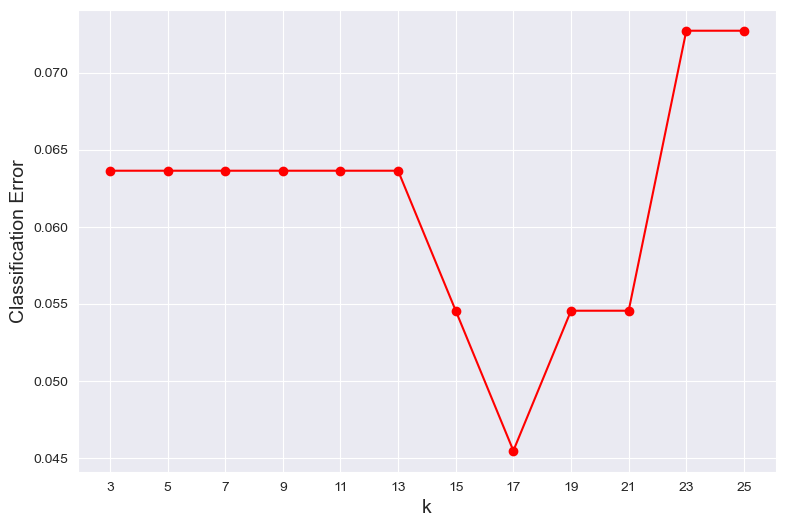

In [40]:
plt.figure(figsize = (9, 6))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()